# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df["title"].apply(len)


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()
f"La media es: {media} la mediana es: {mediana} y la moda es:  {moda[0]}"

'La media es: 15.481103166496425 la mediana es: 14.0 y la moda es:  12'

In [13]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango_len_titulos = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
std_titulos = df['title_length'].std()
f"El rango es: {rango_len_titulos} la varianza es: {varianza} y la desviacion es {std_titulos}"

'El rango es: 67 la varianza es: 72.1067488840288 y la desviacion es 8.491569282766807'

In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria =  df['title_length'].skew()
curtosis = df['title_length'].kurt()
f"la curtosis es: {curtosis} y la asimetria es: {asimetria}"


'la curtosis es: 3.8122887061291544 y la asimetria es: 1.5252523464631278'

In [6]:
# Imprime el título más corto y el título más largo según su longitud
len_max = df.loc[df['title_length'].idxmax(),['title']]
len_min = df.loc[df['title_length'].idxmin(),['title']]
len_max, len_min



(title    Dr. Strangelove or: How I Learned to Stop Worr...
 Name: 48, dtype: object,
 title    M
 Name: 63, dtype: object)

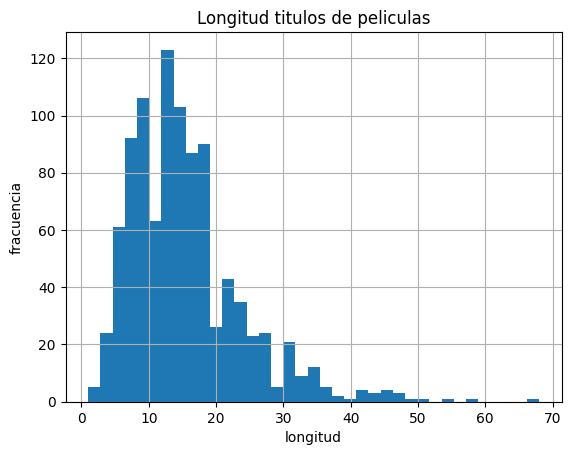

In [ ]:
# grafica tus resultados
df["title_length"].hist(bins="auto")
plt.title("Longitud titulos de peliculas")
plt.xlabel("Longitud")
plt.ylabel("Fracuencia")
plt.show()

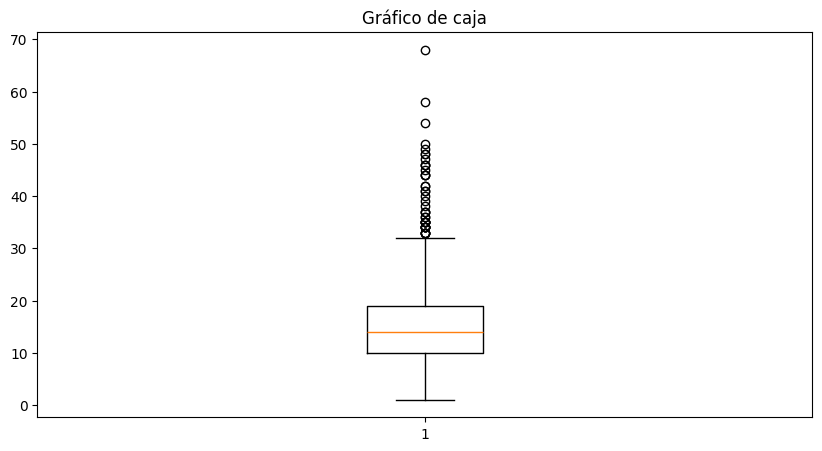

In [8]:
plt.figure(figsize = (10, 5))
plt.boxplot(df["title_length"])
plt.title("Gráfico de caja")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista_len = df['title_length'].head().tolist()
lista_len


[24, 13, 22, 15, 12]

In [10]:
# Calcula la media de los 5 valores
suma_list = sum(lista_len)
media_lista = suma_list/len(lista_len)
f"La media de la lista es {media_lista}"

'La media de la lista es 17.2'

In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias = [(x - media_lista) for x in lista_len]
diferencias_cuadrado = [j ** 2 for j in diferencias]
f"La diferencias al cuadrado son: {diferencias_cuadrado}"

' la diferencias al cuadrado son: [46.24000000000001, 17.639999999999993, 23.040000000000006, 4.839999999999997, 27.039999999999992]'

In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = sum(diferencias_cuadrado) / len(lista_len)
desviacion = varianza ** (1/2)
f"La varianza es: {varianza} y la desviacion es: {desviacion}"

'la varianza es: 23.76 y la desviacion es: 4.874423042781577'